![reliaility](/Users/nglongvu1002/Desktop/rawmodel.png)


# <font color="006179"> Package Required</font>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, time
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, average_precision_score, roc_curve, precision_recall_curve, auc

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from xgboost import XGBClassifier
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import joblib


In [2]:
df = pd.read_csv("/Users/nglongvu1002/Desktop/dataset/fraudTrain.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
#Display the data
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
#Sum the missing value
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
#Summary the description of the dataset
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

# <font color ="006179"> Split Dataset

#### Stratified Splitting?

* **Maintain Class Proportion**: Ensures that both training and test set have the same class distribution as the original dataset
* **Performance Metrics**: Obtaining more accurate metrics, especially in imbalanced datasets
* **Better Generalization**: Improves model generalization by providing a representative sample of the dataset for training and testing

In [9]:
#Split the data into training and test sets using Stratified splitting
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [10]:
X_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
841210,841210,2019-12-13 22:17:17,30082025922891,fraud_Kulas Group,health_fitness,3.42,Kathleen,Thompson,F,199 Patterson Fords Apt. 132,...,34112,26.1184,-81.7361,276002,"Pilot, airline",1934-06-23,efbe01a3b08947a28fd922ecb1d09993,1355437037,25.340639,-81.969550
289511,289511,2019-05-22 14:55:21,38588538868506,fraud_Prosacco LLC,personal_care,97.27,Jacqueline,Curry,F,3047 Jeff Place,...,79842,30.1886,-103.2214,498,Lexicographer,1990-11-23,22f228b0deb998db42fbdbdb585cd60b,1337698521,31.049011,-102.642045
500299,500299,2019-08-05 12:16:58,30030380240193,fraud_Leffler-Goldner,personal_care,84.73,William,Jenkins,M,50614 Kevin Point,...,78631,30.2816,-99.2410,2395,"Pharmacist, community",1993-11-17,c41d3873fd9999d624263a40a6df3790,1344169018,30.911194,-99.769547
103181,103181,2019-03-01 12:25:52,30199621383748,"fraud_Hauck, Dietrich and Funk",kids_pets,111.25,Theresa,Powell,F,117 Natasha Vista Suite 936,...,75452,33.4044,-96.2238,4090,Sub,1977-03-23,0bd75825d0dd2693a8611cbddf0ccc8c,1330604752,33.700594,-96.249006
676466,676466,2019-10-14 23:52:38,30131826429364,fraud_Beier-Hyatt,shopping_pos,6.41,Brianna,Foley,F,57256 Raymond Ports,...,37932,35.9335,-84.1481,391389,"Designer, industrial/product",1994-04-22,184d3750427f35cee975dee1f724d4a0,1350258758,35.516815,-84.590520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194409,194409,2019-04-10 10:34:55,4988304376504,fraud_Smith-Stokes,misc_pos,6.38,William,Thompson,M,977 Rita Grove Apt. 000,...,12575,41.4575,-74.1659,2258,Building surveyor,1937-03-17,b748daa340f38a2b60dac9d240eaf02c,1334054095,41.247041,-73.911129
611974,611974,2019-09-16 18:58:31,341283058448499,fraud_Labadie LLC,personal_care,16.48,Mario,Johns,M,62130 Miller Square Suite 785,...,39825,30.9788,-84.7373,1461,"Engineer, broadcasting (operations)",1935-09-08,9a615a0b91659dcc9d9e53da8ea26e3c,1347821911,30.395907,-85.067176
913956,913956,2019-12-29 18:05:43,6011252220172077,fraud_Reichel LLC,personal_care,95.00,Melvin,Wright,M,210 Dean Causeway Suite 130,...,51003,42.9782,-96.0173,1700,"Engineer, land",2001-12-19,5b487decd4b99c544049bb7f7e96d204,1356804343,42.333564,-96.880575
740206,740206,2019-11-12 04:20:35,30135235368675,fraud_Smitham-Schiller,grocery_net,58.07,Amanda,Williams,F,02018 Gary Key Apt. 911,...,64058,39.1412,-94.3515,123373,"Engineer, production",1992-11-27,6df794ad88048a1a6384b40d22da259b,1352694035,38.754511,-94.470274


# <font color ="006179"> Pre-Processing </font>

In [11]:
# Convert 'trans_date_trans_time' to separate columns
X_train['trans_date'] = pd.to_datetime(X_train['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.date
X_train['trans_time'] = pd.to_datetime(X_train['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.time

# Convert 'trans_date_trans_time' to separate columns
X_test['trans_date'] = pd.to_datetime(X_test['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.date
X_test['trans_time'] = pd.to_datetime(X_test['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.time

# Remove 'Unnamed: 0' and 'trans_date_trans_time' columns
if 'Unnamed: 0' in X_train.columns:
    X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_train.drop('trans_date_trans_time', axis=1, inplace=True)

# Apply similar transformations to the test data
if 'Unnamed: 0' in X_test.columns:
    X_test.drop(columns=['Unnamed: 0'], inplace=True)
X_test.drop('trans_date_trans_time', axis=1, inplace=True)


In [12]:
# Reorder columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in X_train.columns if col not in ['trans_date', 'trans_time']]
X_train = X_train[columns]

X_test = X_test[columns]

In [13]:
# Convert 'dob' to datetime
X_train['dob'] = pd.to_datetime(X_train['dob'], format='%Y-%m-%d')

# Convert 'trans_time' to time
X_train['trans_time'] = pd.to_datetime(X_train['trans_time'], format='%H:%M:%S').dt.time

# Convert 'trans_date' to date
X_train['trans_date'] = pd.to_datetime(X_train['trans_date'])

# Check the data types
print("\nData types of the columns in training set:")
print(X_train.dtypes)

# Apply similar transformations to the test data
X_test['dob'] = pd.to_datetime(X_test['dob'], format='%Y-%m-%d')
X_test['trans_time'] = pd.to_datetime(X_test['trans_time'], format='%H:%M:%S').dt.time
X_test['trans_date'] = pd.to_datetime(X_test['trans_date'])


Data types of the columns in training set:
trans_date    datetime64[ns]
trans_time            object
cc_num                 int64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
dtype: object


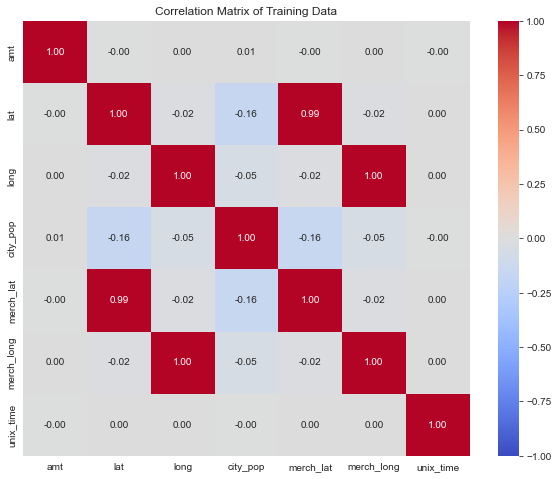

In [14]:
# Select numerical columns from the training data
numerical_columns_train = X_train[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]

# Compute the correlation matrix
correlation_matrix_train = numerical_columns_train.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Training Data')
plt.show()

# <font color="006179"> Feature Engineering </font>


## <font color ="3fd8fe"> 1. Transaction Frequency Features </font>


In [15]:
# Compute the number of transactions per user in the training data
transactions_per_user_train = X_train['cc_num'].value_counts()

# Statistical summary of total transactions per user
stats_summary_train = transactions_per_user_train.agg(['mean', 'median', 'min', 'max'])
print("Statistical Summary of Total Transactions per User (Training Data):")
print(stats_summary_train)

# Compute the number of transactions per user in the test data
transactions_per_user_test = X_test['cc_num'].value_counts()

# Ensure the same aggregation is applied
# Adding this step to ensure proper transformation
stats_summary_test = transactions_per_user_test.agg(['mean', 'median', 'min', 'max'])
print("\nStatistical Summary of Total Transactions per User (Test Data):")
print(stats_summary_test)

Statistical Summary of Total Transactions per User (Training Data):
mean       923.369278
median     750.000000
min          3.000000
max       2214.000000
Name: count, dtype: float64

Statistical Summary of Total Transactions per User (Test Data):
mean      398.160696
median    337.000000
min         1.000000
max       976.000000
Name: count, dtype: float64


### <font color ="89CFF0"> 1.1 Create feature for total transactions per day per user


In [16]:
# Compute transactions per day for the training data
X_train['transactions_per_day'] = X_train.groupby(['cc_num', X_train['trans_date'].dt.date])['trans_date'].transform('count')

print("Training Data:")
print(X_train[['cc_num', 'trans_date', 'transactions_per_day']].head())

# Apply the same transformation to the test data
# To ensure consistency, we need to use the same groupings as in the training data
X_test['transactions_per_day'] = X_test.groupby(['cc_num', X_test['trans_date'].dt.date])['trans_date'].transform('count')

print("\nTest Data:")
print(X_test[['cc_num', 'trans_date', 'transactions_per_day']].head())


Training Data:
                  cc_num trans_date  transactions_per_day
192318  3590736522064285 2019-04-08                     3
318906  3546897637165774 2019-06-02                     5
212432  2260801330657968 2019-04-18                     1
979043    30044330818990 2020-02-01                     1
614236  4951647200979051 2019-09-17                     3

Test Data:
                cc_num trans_date  transactions_per_day
841210  30082025922891 2019-12-13                     3
289511  38588538868506 2019-05-22                     1
500299  30030380240193 2019-08-05                     5
103181  30199621383748 2019-03-01                     3
676466  30131826429364 2019-10-14                     1


### <font color ="89CFF0"> 1.2 Create feature for total transactions per week per user

In [17]:
# Create 'Week' column
X_train['Week'] = X_train['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
X_train['transaction_per_week'] = X_train.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated training dataframe
print("Training Data:")
print(X_train[['cc_num', 'Week', 'transaction_per_week']].head())

# Apply the same transformations to the Test Data
# Create 'Week' column
X_test['Week'] = X_test['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
X_test['transaction_per_week'] = X_test.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

X_train['Week'] = X_train['Week'].astype(int)
X_test['Week'] = X_test['Week'].astype(int)

# Display the updated test dataframe
print("\nTest Data:")
print(X_test[['cc_num', 'Week', 'transaction_per_week']].head())

Training Data:
                  cc_num  Week  transaction_per_week
192318  3590736522064285    15                    57
318906  3546897637165774    22                    49
212432  2260801330657968    16                    12
979043    30044330818990     5                    29
614236  4951647200979051    38                    21

Test Data:
                cc_num  Week  transaction_per_week
841210  30082025922891    50                    10
289511  38588538868506    21                    11
500299  30030380240193    32                    11
103181  30199621383748     9                    22
676466  30131826429364    42                     9


In [18]:
# Calculate total transactions per month for the training data
total_transactions_per_month_train = X_train.groupby(X_train['trans_date'].dt.month).size()
# Calculate total transactions per month for the test data
total_transactions_per_month_test = X_test.groupby(X_test['trans_date'].dt.month).size()


### <font color ="89CFF0"> 1.3 Create feature for total transactions per month per user


In [19]:
# Compute total transactions per user per month in training data
X_train['transactions_per_month'] = X_train.groupby(['cc_num', X_train['trans_date'].dt.month])['trans_date'].transform('count')

# Display the result for training data
print("Training Data:")
print(X_train[['cc_num', 'trans_date', 'transactions_per_month']].head())

# Apply the same transformation to the test data
# Add 'transactions_per_month' to test data
X_test['transactions_per_month'] = X_test.groupby(['cc_num', X_test['trans_date'].dt.month])['trans_date'].transform('count')

# Display the result for test data
print("Test Data:")
print(X_test[['cc_num', 'trans_date', 'transactions_per_month']].head())

Training Data:
                  cc_num trans_date  transactions_per_month
192318  3590736522064285 2019-04-08                     259
318906  3546897637165774 2019-06-02                     150
212432  2260801330657968 2019-04-18                      38
979043    30044330818990 2020-02-01                     114
614236  4951647200979051 2019-09-17                      96
Test Data:
                cc_num trans_date  transactions_per_month
841210  30082025922891 2019-12-13                      53
289511  38588538868506 2019-05-22                      55
500299  30030380240193 2019-08-05                      43
103181  30199621383748 2019-03-01                      75
676466  30131826429364 2019-10-14                      43


### <font color ="89CFF0"> 1.4 Create feature for total transactions per quarter (season) per user


In [20]:
# Define the season function
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'

# Apply the season function to create a new column 'season'
X_train['season'] = X_train['trans_date'].apply(season)

# Calculate the number of transactions per season for each credit card number
X_train['transactions_per_season'] = X_train.groupby(['cc_num', 'season'])['trans_date'].transform('count')

# Display the updated training data
print(X_train)

# Apply the season function to create a new column 'season' in test data
X_test['season'] = X_test['trans_date'].apply(season)
X_test['transactions_per_season'] = X_test.groupby(['cc_num', 'season'])['trans_date'].transform('count')



        trans_date trans_time            cc_num  \
192318  2019-04-08   23:46:57  3590736522064285   
318906  2019-06-02   12:25:41  3546897637165774   
212432  2019-04-18   17:44:59  2260801330657968   
979043  2020-02-01   23:01:47    30044330818990   
614236  2019-09-17   23:20:40  4951647200979051   
...            ...        ...               ...   
125527  2019-03-10   21:06:15    30044330818990   
150047  2019-03-22   05:06:39  3587044315915002   
1151888 2020-04-25   18:11:52  4169759661243568   
547306  2019-08-22   14:59:38    30118423745458   
33493   2019-01-20   22:31:23  2712209726293386   

                                    merchant        category     amt  \
192318                   fraud_Stamm-Witting    shopping_net  199.87   
318906       fraud_Lowe, Dietrich and Erdman       kids_pets   13.65   
212432                         fraud_Kub PLC   personal_care   47.98   
979043                     fraud_Streich Ltd            home  157.10   
614236              fraud_W

### <font color ="89CFF0"> 1.5 Create feature for which part of the day that transaction made


In [21]:
# Define the function to map hours to parts of the day
def part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Ensure trans_time is in the correct format
if isinstance(X_train['trans_time'].iloc[0], time):
    X_train['trans_time'] = X_train['trans_time'].apply(lambda x: datetime.combine(datetime.today(), x))
    X_test['trans_time'] = X_test['trans_time'].apply(lambda x: datetime.combine(datetime.today(), x))

# Extract hour from the trans_time column
X_train['hour'] = X_train['trans_time'].dt.hour
X_test['hour'] = X_test['trans_time'].dt.hour

# Apply the part_of_day function
X_train['part_of_day'] = X_train['hour'].apply(part_of_day)
X_test['part_of_day'] = X_test['hour'].apply(part_of_day)

# Drop the hour column if not needed
X_train = X_train.drop(columns=['hour'])
X_test = X_test.drop(columns=['hour'])

# Initialize the LabelEncoder for the part_of_day feature
part_of_day_encoder = LabelEncoder()

# Fit and transform on the training data
X_train['part_of_day'] = part_of_day_encoder.fit_transform(X_train['part_of_day'])

# Transform the test data using the fitted encoder
X_test['part_of_day'] = part_of_day_encoder.transform(X_test['part_of_day'])

## <font color ="3fd8fe">2. User Transaction Behavior</font>

In [22]:
# Compute aggregations for the training data
agg_df_train = X_train.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge aggregation results back to the training data
X_train = X_train.merge(agg_df_train, on='cc_num', how='left')

# Compute aggregations for the test data
# First, make sure the test data has the same cc_num values as in the training data
agg_df_test = X_test.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge aggregation results back to the test data
X_test = X_test.merge(agg_df_test, on='cc_num', how='left')

# Display the updated training and test data
print("Training Data with Aggregations:")
print(X_train)


Training Data with Aggregations:
       trans_date          trans_time            cc_num  \
0      2019-04-08 2024-08-12 23:46:57  3590736522064285   
1      2019-06-02 2024-08-12 12:25:41  3546897637165774   
2      2019-04-18 2024-08-12 17:44:59  2260801330657968   
3      2020-02-01 2024-08-12 23:01:47    30044330818990   
4      2019-09-17 2024-08-12 23:20:40  4951647200979051   
...           ...                 ...               ...   
907667 2019-03-10 2024-08-12 21:06:15    30044330818990   
907668 2019-03-22 2024-08-12 05:06:39  3587044315915002   
907669 2020-04-25 2024-08-12 18:11:52  4169759661243568   
907670 2019-08-22 2024-08-12 14:59:38    30118423745458   
907671 2019-01-20 2024-08-12 22:31:23  2712209726293386   

                                   merchant        category     amt  \
0                       fraud_Stamm-Witting    shopping_net  199.87   
1           fraud_Lowe, Dietrich and Erdman       kids_pets   13.65   
2                             fraud_Kub PLC  

## <font color ="3fd8fe">3. User-Based Features: Age and Gender </font>


### <font color ="89CFF0"> 3.1 Calculate age of user based on DOB and transation date</font>

In [23]:
#Calculate user's age based on date of birth and transaction date
def calculate_age(dob, trans_date):
    return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))

# Apply the function to calculate age in the training data
X_train['age'] = X_train.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

# Apply the function to calculate age in the test data
X_test['age'] = X_test.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

# Explore age statistics in the training data
age_stats = X_train['age'].agg(['mean', 'median', 'min', 'max'])
print("Age Statistics in Training Data:")
print(age_stats)

Age Statistics in Training Data:
mean      45.496459
median    43.000000
min       13.000000
max       95.000000
Name: age, dtype: float64


### <font color ="89CFF0"> 3.2 Convert gender into binary values</font>

In [24]:
# Convert 'gender' to binary values: M -> 1, F -> 0
gender_mapping = {'M': 1, 'F': 0}
X_train['gender'] = X_train['gender'].map(gender_mapping)
X_test['gender'] = X_test['gender'].map(gender_mapping)

# Print the number of customers based on age (gender)
print('\n The number of customers based on gender is:')
print(X_train['gender'].value_counts())
print("-" * 40)

# Total transaction amount by gender in the training data
print('\nTotal transaction amount made by gender in training data is:')
print(X_train.groupby('gender')['amt'].sum())
print("-" * 40)

# If you need to calculate total transaction amount by gender in test data:
print('\nTotal transaction amount made by gender in test data is:')
print(X_test.groupby('gender')['amt'].sum())
print("-" * 40)


 The number of customers based on gender is:
gender
0    496009
1    411663
Name: count, dtype: int64
----------------------------------------

Total transaction amount made by gender in training data is:
gender
0    34829614.85
1    28961681.84
Name: amt, dtype: float64
----------------------------------------

Total transaction amount made by gender in test data is:
gender
0    15002997.98
1    12428134.23
Name: amt, dtype: float64
----------------------------------------


## <font color ="3fd8fe">4. Fraud Transaction Analysis</font>

###  <font color="d2f5fe">4.1 Calculate fraud ratio using fraudulent transactions and total transactions</font>


In [25]:
# Add 'is_fraud' to X_train for calculation purposes
X_train['is_fraud'] = y_train

# Calculate the fraud ratio efficiently
fraud_transactions_per_user = X_train.groupby('cc_num')['is_fraud'].sum().reset_index(name='fraud_transactions')
total_transactions_per_user = X_train.groupby('cc_num').size().reset_index(name='total_transactions')

# Merge to get fraud ratio per user
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['fraud_transactions'] / fraud_ratio_per_user['total_transactions']

# Rename columns to avoid conflicts
X_train = X_train.merge(fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')

# Remove the 'is_fraud' column from X_train
X_train = X_train.drop(columns=['is_fraud'])

# Apply the same fraud_ratio transformation to the test data
# Initialize 'fraud_ratio' column with NaN
X_test = X_test.merge(fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')

# Display the updated training and test data
print("Training Data:")
print(X_train)
print("\nTest Data:")
print(X_test)

Training Data:
       trans_date          trans_time            cc_num  \
0      2019-04-08 2024-08-12 23:46:57  3590736522064285   
1      2019-06-02 2024-08-12 12:25:41  3546897637165774   
2      2019-04-18 2024-08-12 17:44:59  2260801330657968   
3      2020-02-01 2024-08-12 23:01:47    30044330818990   
4      2019-09-17 2024-08-12 23:20:40  4951647200979051   
...           ...                 ...               ...   
907667 2019-03-10 2024-08-12 21:06:15    30044330818990   
907668 2019-03-22 2024-08-12 05:06:39  3587044315915002   
907669 2020-04-25 2024-08-12 18:11:52  4169759661243568   
907670 2019-08-22 2024-08-12 14:59:38    30118423745458   
907671 2019-01-20 2024-08-12 22:31:23  2712209726293386   

                                   merchant        category     amt  \
0                       fraud_Stamm-Witting    shopping_net  199.87   
1           fraud_Lowe, Dietrich and Erdman       kids_pets   13.65   
2                             fraud_Kub PLC   personal_care   4

## <font color ="3fd8fe">5. Geography Analysis

### <font color="d2f5fe">5.1 Distance calculation using Haversine calculation</font>


In [26]:
# Create the Haversine function using transaction longitude and latitude, also using merchant's longitude and latitude
def haversine(lat1, lon1, lat2, lon2):
    # Distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # Convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # Apply formula
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

# Apply the Haversine function to calculate 'distance_to_merch' for training data
X_train['distance_to_merch'] = X_train.apply(
    lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']),
    axis=1
)

# Apply the Haversine function to calculate 'distance_to_merch' for test data
X_test['distance_to_merch'] = X_test.apply(
    lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']),
    axis=1
)

### <font color="d2f5fe">5.2 Categorize type of cities based on the population</font>



In [27]:
# Function to categorize city_pop
def categorize_population(population):
    if population < 1000:
        return 'Small'
    elif 1000 <= population <= 10000:
        return 'Medium'
    else:
        return 'Large'
#Apply the function to create a column called "pop_caregory" for train data
X_train['pop_cat'] = X_train['city_pop'].apply(categorize_population)
# Apply the fitted transform for test data
X_test['pop_cat'] = X_test['city_pop'].apply(categorize_population)


# <font color="006179">Feature Importance Technique</font>

Feature selection should be performed only on the training data. The reason is that feature selection involves fitting a model or evaluating features based on the training data. By doing this, you ensure that the feature selection process is guided by the patterns and relationships present in the training data.

Performing feature selection or importance analysis on both training and test data simultaneously can lead to data leakage. Data leakage occurs when information from outside the training dataset is used to create the model. This can lead to overly optimistic performance estimates and poor generalization to new, unseen data.


In [28]:
X_train.dtypes

trans_date                 datetime64[ns]
trans_time                 datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                              int64
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
transactions_per_day                int64
Week                              

![reliaility](/Users/nglongvu1002/Desktop/reliability.png)

## <font color ="3fd8fe"> 1. Correlation Matrix</font>

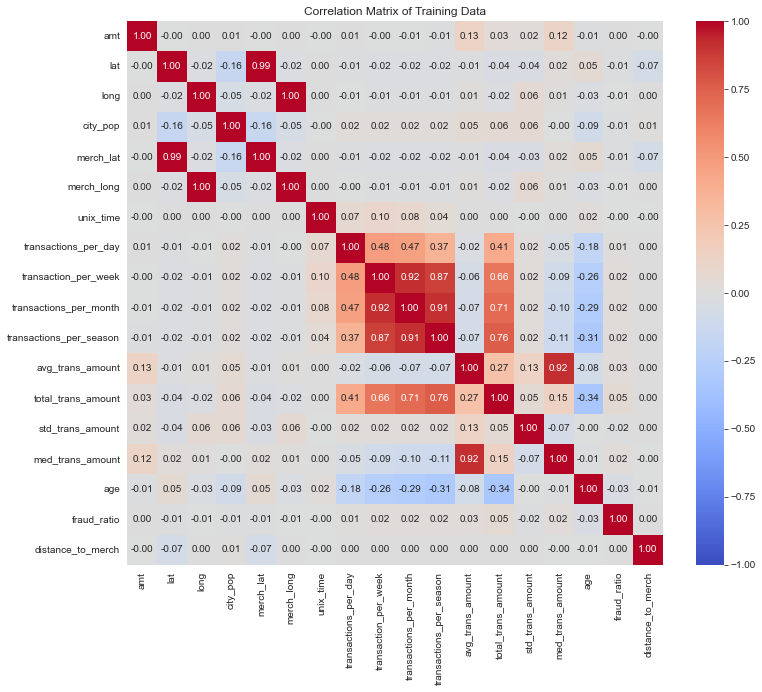

In [29]:
# Compute the correlation matrix for the training data
numerical_columns_train = X_train[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time', 'transactions_per_day', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'avg_trans_amount', 'total_trans_amount', 'std_trans_amount', 'med_trans_amount', 'age', 'fraud_ratio', 'distance_to_merch']]
correlation_matrix_train = numerical_columns_train.corr()

# Create a heatmap to visualize the correlation matrix for training data
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Training Data')
plt.show()

Based on the correlation matrix shown in the image, here are some key takeaways and insights:

High correlations among transaction frequency features:
* There are strong positive correlations between transactions_per_day, transaction_per_week, transactions_per_month, and transactions_per_season. This suggests redundancy in these features.
* Strong correlation between transaction amounts: avg_trans_amount, total_trans_amount, and med_trans_amount show high positive correlations with each other.
* Latitude and longitude correlation: merch_lat (merchant latitude) and merch_long (merchant longitude) are perfectly correlated (1.00), indicating they provide the same information.
* Age has negative correlations: Age shows weak to moderate negative correlations with transaction frequency and amount features.
* Low correlation of some features: Features like ant, bng, unix_time, std_trans_amount, fraud_ratio, and distance_to_merch have very low correlations
with most other features.
* City population (city_pop) has weak correlations: This feature shows only weak correlations with other variables.

Recommendations for feature removal/selection:

* Remove one of merch_lat or merch_long, as they are perfectly correlated.
* Consider removing some of the highly correlated transaction frequency features (e.g., keep only transactions_per_month and remove the others).
* You might want to keep only one or two of the highly correlated transaction amount features (avg_trans_amount, total_trans_amount, med_trans_amount).
* Features with very low correlations across the board (like amt, unix_time, fraud_ratio, distance_to_merch) might be candidates for removal, but consider their potential importance to the specific problem you're solving before discarding them.
* Keep age, as it shows some interesting negative correlations that might be valuable for your model.

## <font color ="3fd8fe"> 2. Correlation Coefficient for Numerical Features</font>

In [30]:
# Combine the training features and target variable into a single DataFrame
train_data = X_train.copy()
train_data['is_fraud'] = y_train

# Compute Pearson correlation coefficient for the specified features with 'is_fraud'
features = ['transactions_per_day', 'transaction_per_week', 'transactions_per_month','transactions_per_season','avg_trans_amount', 'total_trans_amount',
            'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio',
            'distance_to_merch', 'is_fraud']

correlation = train_data[features].corr()['is_fraud']

# Print the Pearson correlation coefficients
print("Pearson correlation coefficients with 'is_fraud':")
print(correlation)

Pearson correlation coefficients with 'is_fraud':
transactions_per_day       0.001525
transaction_per_week       0.000906
transactions_per_month     0.000939
transactions_per_season    0.000614
avg_trans_amount           0.000991
total_trans_amount         0.001963
med_trans_amount           0.000936
std_trans_amount          -0.000598
age                       -0.001296
fraud_ratio                0.038239
distance_to_merch         -0.002517
is_fraud                   1.000000
Name: is_fraud, dtype: float64


##### Good Correlation
- **Criteria**: Features with high absolute correlation coefficients (|correlation| > 0.1).
- **Features**:
  - None

##### Moderate Correlation
- **Criteria**: Features with moderate absolute correlation coefficients (0.05 < |correlation| ≤ 0.1).
- **Features**:
  - None

##### Weak Correlation
- **Criteria**: Features with low absolute correlation coefficients (|correlation| ≤ 0.05).
- **Features**:
  - `transactions_per_day` (0.001525)
  - `transaction_per_week` (0.000906)
  - `transactions_per_month` (0.000939)
  - `transactions_per_season` (0.000614)
  - `avg_trans_amount` (0.000991)
  - `total_trans_amount` (0.001963)
  - `med_trans_amount` (0.000936)
  - `std_trans_amount` (-0.000598)
  - `age` (-0.001296)
  - `fraud_ratio` (0.038239)
  - `distance_to_merch` (-0.002517)

##### Features to Remove
- **All features show weak correlation**: Since all features have very low correlation coefficients with `is_fraud`, it is suggested to carefully consider the usefulness of each feature. However, `fraud_ratio` has the highest correlation and might still be useful.

##### Features to Keep
- **fraud_ratio**: Despite having a weak correlation, it has the highest correlation coefficient among the features and could still provide some valuable information.

##### Recommendation

Based on the Pearson correlation coefficients, it is recommended to consider the usefulness of each feature carefully. Although all features show weak correlations with `is_fraud`, `fraud_ratio` stands out as having the highest correlation coefficient and might still be useful for the model. Regular feature importance evaluation and domain knowledge should guide the final decision on feature selection. Additionally, consider using regularization techniques like Ridge or Lasso regression to handle potential issues with weakly correlated features.

- **Remove**: Consider removing features with extremely low correlation coefficients, but proceed with caution and validate through model performance.
- **Keep**: `fraud_ratio`

Regularly evaluate feature importance using model-based techniques and domain knowledge to ensure the selected features contribute effectively to the model's performance.

 ## <font color ="3fd8fe"> 3. Chi-Square Test for Categorical Features</font>

In [31]:
#Combine X_train and y_train to get the complete training dataset for analysis
train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)

# List of categorical columns to test
categorical_cols = ['category', 'gender', 'city', 'state', 'Week', 'age', 'pop_cat','part_of_day']

# Loop through each categorical column and perform chi-square test
results = []
for col in categorical_cols:
    # Handle numerical columns separately for Chi-square test
    if train_data[col].dtype == 'object' or len(train_data[col].unique()) < 20:
        contingency_table = pd.crosstab(train_data[col], train_data['is_fraud'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results.append({'Feature': col, 'Chi2': chi2, 'P-value': p})

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print("Chi-square test results for categorical features and is_fraud in the training set:\n", results_df)

Chi-square test results for categorical features and is_fraud in the training set:
        Feature          Chi2        P-value
0     category   4453.817550   0.000000e+00
1       gender     57.406250   3.544790e-14
2         city  71274.336663   0.000000e+00
3        state   1412.016887  9.509516e-263
4      pop_cat      2.515593   2.842797e-01
5  part_of_day   7212.900311   0.000000e+00



##### Good Correlation
- **Criteria**: Features with very high Chi-square values and extremely low P-values (P < 0.001).
- **Features**:
  - `category` (Chi2 = 4453.817550, P-value = 0.000000e+00)
  - `city` (Chi2 = 71274.336663, P-value = 0.000000e+00)
  - `state` (Chi2 = 1412.016887, P-value = 9.509516e-263)
  - `part_of_day` (Chi2 = 7212.900311, P-value = 0.000000e+00)

##### Moderate Correlation
- **Criteria**: Features with moderate Chi-square values and low P-values (0.001 < P < 0.05).
- **Features**:
  - `gender` (Chi2 = 57.406250, P-value = 3.544790e-14)

##### Weak Correlation
- **Criteria**: Features with low Chi-square values and high P-values (P > 0.05).
- **Features**:
  - `pop_cat` (Chi2 = 2.515593, P-value = 2.842797e-01)

##### Features to Remove
- **pop_cat**: This feature shows a weak correlation with `is_fraud` and has a high P-value, indicating that it is not statistically significant.

##### Features to Keep
- **category**: Shows a strong correlation with `is_fraud`.
- **city**: Shows a very strong correlation with `is_fraud`.
- **state**: Shows a strong correlation with `is_fraud`.
- **part_of_day**: Shows a strong correlation with `is_fraud`.
- **gender**: Although it shows a moderate correlation, it is statistically significant and might still provide useful information.

##### Recommendation

Based on the Chi-square test results, it is recommended to keep the features that show good and moderate correlations with the target variable (`is_fraud`). These features are statistically significant and likely contribute valuable information for the model. Specifically:

- **Remove**: `pop_cat`
- **Keep**: `category`, `city`, `state`, `part_of_day`, `gender`

Regularly review the importance of these features through feature importance techniques (e.g., tree-based models) and monitor for potential multicollinearity, especially between `city` and `state`. If regularization methods like Ridge or Lasso regression are used, they can help mitigate the effects of multicollinearity by penalizing the magnitude of coefficients.

# <font color="006179"> Fuzzy Logic


* **`Fraud Ratio`**: Directly measure the proportion of fraudulent activities related to the given data.
* **`Age`**: Weak correlation, however fuzzy logic can capture the non-linear relationship between age and target variable. For instance, age-related behavior patterns might affect transaction types of frequencies
* **`Transaction Amount`**: Weak correlation, however transaction amount can still be relevant because large transactions might be more suspicious or more frequently associated with fraud. Since fuzzy logic can handle uncertainty, amt can capture nuanced patterns through fuzzy membership functions, especially useful when exact boundaries are not clear. 
* **`Transactions_per_season`**: The number of transactions per season might not have a strong individual correlation with fraud, but it could be important in the context of seasonal patterns. For instance, an unusual increase in transactions during a particular season could indicate fraudulent activity.

In [32]:
def create_fuzzy_features(df):
    # Create fuzzy features

    # 1. Fuzzy transaction amount
    max_amt = df['amt'].max()
    amount = ctrl.Antecedent(np.arange(0, max_amt + 1, 1), 'amount')
    amount['low'] = fuzz.trimf(amount.universe, [0, 0, min(50, max_amt)])
    amount['medium'] = fuzz.trimf(amount.universe, [0, min(50, max_amt), min(100, max_amt)])
    amount['high'] = fuzz.trimf(amount.universe, [min(50, max_amt), min(100, max_amt), max_amt])

    df['fuzzy_amount_low'] = fuzz.interp_membership(amount.universe, amount['low'].mf, df['amt'])
    df['fuzzy_amount_medium'] = fuzz.interp_membership(amount.universe, amount['medium'].mf, df['amt'])
    df['fuzzy_amount_high'] = fuzz.interp_membership(amount.universe, amount['high'].mf, df['amt'])

    # 2. Fuzzy age
    max_age = df['age'].max()
    age = ctrl.Antecedent(np.arange(0, max_age + 1, 1), 'age')
    age['young'] = fuzz.trimf(age.universe, [0, 0, min(30, max_age)])
    age['middle'] = fuzz.trimf(age.universe, [20, min(40, max_age), min(60, max_age)])
    age['old'] = fuzz.trimf(age.universe, [min(50, max_age), max_age, max_age])

    df['fuzzy_age_young'] = fuzz.interp_membership(age.universe, age['young'].mf, df['age'])
    df['fuzzy_age_middle'] = fuzz.interp_membership(age.universe, age['middle'].mf, df['age'])
    df['fuzzy_age_old'] = fuzz.interp_membership(age.universe, age['old'].mf, df['age'])

    # 3. Fuzzy transaction frequency
    max_freq = df['transactions_per_season'].max()
    freq = ctrl.Antecedent(np.arange(0, max_freq + 1, 1), 'frequency')
    freq['low'] = fuzz.trimf(freq.universe, [0, 0, min(200, max_freq)])
    freq['medium'] = fuzz.trimf(freq.universe, [100, min(300, max_freq), min(500, max_freq)])
    freq['high'] = fuzz.trimf(freq.universe, [min(400, max_freq), max_freq, max_freq])

    df['fuzzy_freq_low'] = fuzz.interp_membership(freq.universe, freq['low'].mf, df['transactions_per_season'])
    df['fuzzy_freq_medium'] = fuzz.interp_membership(freq.universe, freq['medium'].mf, df['transactions_per_season'])
    df['fuzzy_freq_high'] = fuzz.interp_membership(freq.universe, freq['high'].mf, df['transactions_per_season'])

    # 4. Fuzzy fraud ratio
    max_fraud_ratio = df['fraud_ratio'].max()
    fraud_ratio = ctrl.Antecedent(np.arange(0, max_fraud_ratio + 0.001, 0.001), 'fraud_ratio')
    fraud_ratio['low'] = fuzz.trimf(fraud_ratio.universe, [0, 0, min(0.005, max_fraud_ratio)])
    fraud_ratio['medium'] = fuzz.trimf(fraud_ratio.universe, [0.001, min(0.005, max_fraud_ratio), min(0.01, max_fraud_ratio)])
    fraud_ratio['high'] = fuzz.trimf(fraud_ratio.universe, [min(0.005, max_fraud_ratio), max_fraud_ratio, max_fraud_ratio])

    df['fuzzy_fraud_ratio_low'] = fuzz.interp_membership(fraud_ratio.universe, fraud_ratio['low'].mf, df['fraud_ratio'])
    df['fuzzy_fraud_ratio_medium'] = fuzz.interp_membership(fraud_ratio.universe, fraud_ratio['medium'].mf, df['fraud_ratio'])
    df['fuzzy_fraud_ratio_high'] = fuzz.interp_membership(fraud_ratio.universe, fraud_ratio['high'].mf, df['fraud_ratio'])

    return df

# Apply the function to the training set
X_train = create_fuzzy_features(X_train.copy())
# Apply the function to the test set
X_test = create_fuzzy_features(X_test.copy())
# Display the first few rows of the new training DataFrame
print(X_train.head())

# List new fuzzy features
fuzzy_features = [col for col in X_train.columns if col.startswith('fuzzy_')]
print("\nNew fuzzy features:")
print(fuzzy_features)

  trans_date          trans_time            cc_num  \
0 2019-04-08 2024-08-12 23:46:57  3590736522064285   
1 2019-06-02 2024-08-12 12:25:41  3546897637165774   
2 2019-04-18 2024-08-12 17:44:59  2260801330657968   
3 2020-02-01 2024-08-12 23:01:47    30044330818990   
4 2019-09-17 2024-08-12 23:20:40  4951647200979051   

                          merchant        category     amt     first  \
0              fraud_Stamm-Witting    shopping_net  199.87  Kimberly   
1  fraud_Lowe, Dietrich and Erdman       kids_pets   13.65     Kayla   
2                    fraud_Kub PLC   personal_care   47.98   Monique   
3                fraud_Streich Ltd            home  157.10   Allison   
4         fraud_Waters-Cruickshank  health_fitness  111.12  Kimberly   

       last  gender                        street  ... fuzzy_amount_high  \
0  Gonzalez       0   72966 Shannon Pass Apt. 391  ...          0.996340   
1    Obrien       0    7921 Robert Port Suite 343  ...          0.000000   
2       Fox   

# <font color="006179">Feature Selection

##### Removed Features and Reasons

- **`trans_date`, `trans_time`**:
  - **Reason**: Using timestamps directly can introduce high cardinality, which may not be useful for model performance. Additionally, the `trans_time` feature is redundant since we have created the `part_of_day` feature, which effectively captures the time of day for prediction.

- **`first`, `last`, `street`, `merchant`, `job`, `unix_time`**:
  - **Reason**: These features have been removed due to their weak correlation with the target variable and limited predictive power.

- **`gender`**:
  - **Reason**: The Chi-square test indicated that `gender` has weak correlation with the target variable, making it less useful for prediction.

- **`long`, `lat`**:
  - **Reason**: These features are perfectly correlated with `merch_lat` and `merch_long`. Since `merch_lat` and `merch_long` are sufficient for capturing location information, the `long` and `lat` features are redundant.

- **`transaction_per_week`, `transactions_per_season`**:
  - **Reason**: These features show weak correlation coefficients compared to `transactions_per_day` and `transactions_per_month`. Therefore, they are not essential to keep all of them in the model.

- **`std_trans_amount`, `med_trans_amount`**:
  - **Reason**: These features have weak correlation with the target variable compared to `total_trans_amount` and `avg_trans_amount`, making them less significant.

- **`pop_cat`**:
  - **Reason**: This feature shows the weakest correlation in the Chi-square test and thus has minimal impact on the target variable.


In [33]:
columns_to_drop = ['trans_date', 'trans_time', 'dob', 'first', 'last', 'street',
                   'trans_num', 'gender', 'zip', 'long', 'lat', 'job', 'unix_time',
                   'merchant', 'transaction_per_week', 'transactions_per_season',
                   'std_trans_amount', 'med_trans_amount', 'pop_cat']

#Drop specified column from X_train
X_train = X_train.drop(columns=columns_to_drop, errors ='ignore')
# Drop specified columns from X_test
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# Initialize the LabelEncoder
season_encoder = LabelEncoder()
category_encoder = LabelEncoder()
city_encoder = LabelEncoder()
state_encoder = LabelEncoder()

# Fit on training data and transform training data
X_train['season'] = season_encoder.fit_transform(X_train['season'])
X_train['category'] = category_encoder.fit_transform(X_train['category'])
X_train['city'] = city_encoder.fit_transform(X_train['city'])
X_train['state'] = state_encoder.fit_transform(X_train['state'])

# Transform test data using the fitted encoders
X_test['season'] = season_encoder.transform(X_test['season'])
X_test['category'] = category_encoder.transform(X_test['category'])
X_test['city'] = city_encoder.transform(X_test['city'])
X_test['state'] = state_encoder.transform(X_test['state'])

# Display the transformed test set
print(X_test.head())

           cc_num  category     amt  city  state  city_pop  merch_lat  \
0  30082025922891         5    3.42   554      9    276002  25.340639   
1  38588538868506        10   97.27   478     43       498  31.049011   
2  30030380240193        10   84.73   325     43      2395  30.911194   
3  30199621383748         7  111.25   439     43      4090  33.700594   
4  30131826429364        12    6.41   417     42    391389  35.516815   

   merch_long  transactions_per_day  Week  ...  fuzzy_amount_high  \
0  -81.969550                     3    50  ...            0.00000   
1 -102.642045                     1    21  ...            0.94540   
2  -99.769547                     5    32  ...            0.69460   
3  -96.249006                     3     9  ...            0.99961   
4  -84.590520                     1    42  ...            0.00000   

   fuzzy_age_young  fuzzy_age_middle  fuzzy_age_old  fuzzy_freq_low  \
0         0.000000              0.00       0.777778           0.425   
1   

In [34]:
X_train.columns

Index(['cc_num', 'category', 'amt', 'city', 'state', 'city_pop', 'merch_lat',
       'merch_long', 'transactions_per_day', 'Week', 'transactions_per_month',
       'season', 'part_of_day', 'avg_trans_amount', 'total_trans_amount',
       'age', 'fraud_ratio', 'distance_to_merch', 'fuzzy_amount_low',
       'fuzzy_amount_medium', 'fuzzy_amount_high', 'fuzzy_age_young',
       'fuzzy_age_middle', 'fuzzy_age_old', 'fuzzy_freq_low',
       'fuzzy_freq_medium', 'fuzzy_freq_high', 'fuzzy_fraud_ratio_low',
       'fuzzy_fraud_ratio_medium', 'fuzzy_fraud_ratio_high'],
      dtype='object')

# <font color="006179">Adding Regularization Techniques

In [35]:
# Standardize features and apply Ridge Regression
ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_pipeline.fit(X_train, y_train)

# Standardize features and apply Lasso Regression
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1))])

In [36]:
X_train

,cc_num,category,amt,city,state,city_pop,merch_lat,merch_long,transactions_per_day,Week,...,fuzzy_amount_high,fuzzy_age_young,fuzzy_age_middle,fuzzy_age_old,fuzzy_freq_low,fuzzy_freq_medium,fuzzy_freq_high,fuzzy_fraud_ratio_low,fuzzy_fraud_ratio_medium,fuzzy_fraud_ratio_high
0,3590736522064285,11,199.87,54,2,4074,34.963419,-92.300838,3,15,...,0.996340,0.000000,0.85,0.000000,0.000,0.000,1.000000,0.000000,0.456650,0.016805
1,3546897637165774,7,13.65,663,43,263,31.969251,-97.225975,5,22,...,0.000000,0.000000,0.00,0.288889,0.000,0.250,0.140056,0.427754,0.465308,0.000000
2,2260801330657968,10,47.98,631,19,4845,42.419528,-71.966339,1,16,...,0.000000,0.000000,0.00,0.933333,0.455,0.045,0.000000,0.455041,0.431199,0.000000
3,30044330818990,6,157.10,271,9,224256,27.091677,-81.537608,1,5,...,0.997908,0.000000,0.70,0.000000,0.000,0.280,0.123249,0.550056,0.312430,0.000000
4,4951647200979051,5,111.12,450,14,324,37.713140,-89.380534,3,38,...,0.999593,0.000000,0.85,0.000000,0.000,0.965,0.000000,0.020979,0.973776,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907667,30044330818990,0,19.70,271,9,224256,26.986105,-82.688123,5,10,...,0.000000,0.000000,0.65,0.000000,0.000,0.280,0.123249,0.550056,0.312430,0.000000
907668,3587044315915002,12,123.45,295,42,1804,35.018147,-88.395919,2,12,...,0.999141,0.000000,0.80,0.000000,0.000,0.915,0.000000,0.438202,0.452247,0.000000
907669,4169759661243568,1,64.98,434,38,213,40.191038,-77.350918,4,17,...,0.299600,0.000000,0.60,0.000000,0.000,0.000,0.288515,0.439776,0.450280,0.000000
907670,30118423745458,7,33.65,485,31,30770,40.081094,-73.434345,2,34,...,0.000000,0.133333,0.30,0.000000,0.000,0.955,0.000000,0.724138,0.094828,0.000000


In [37]:
# Fit feature selection on training data
selector = SelectKBest(score_func=f_classif, k='all')
X_train_selected = selector.fit_transform(X_train, y_train)

# Apply the same feature selection to test data
X_test_selected = selector.transform(X_test)

In [38]:
X_train

,cc_num,category,amt,city,state,city_pop,merch_lat,merch_long,transactions_per_day,Week,...,fuzzy_amount_high,fuzzy_age_young,fuzzy_age_middle,fuzzy_age_old,fuzzy_freq_low,fuzzy_freq_medium,fuzzy_freq_high,fuzzy_fraud_ratio_low,fuzzy_fraud_ratio_medium,fuzzy_fraud_ratio_high
0,3590736522064285,11,199.87,54,2,4074,34.963419,-92.300838,3,15,...,0.996340,0.000000,0.85,0.000000,0.000,0.000,1.000000,0.000000,0.456650,0.016805
1,3546897637165774,7,13.65,663,43,263,31.969251,-97.225975,5,22,...,0.000000,0.000000,0.00,0.288889,0.000,0.250,0.140056,0.427754,0.465308,0.000000
2,2260801330657968,10,47.98,631,19,4845,42.419528,-71.966339,1,16,...,0.000000,0.000000,0.00,0.933333,0.455,0.045,0.000000,0.455041,0.431199,0.000000
3,30044330818990,6,157.10,271,9,224256,27.091677,-81.537608,1,5,...,0.997908,0.000000,0.70,0.000000,0.000,0.280,0.123249,0.550056,0.312430,0.000000
4,4951647200979051,5,111.12,450,14,324,37.713140,-89.380534,3,38,...,0.999593,0.000000,0.85,0.000000,0.000,0.965,0.000000,0.020979,0.973776,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907667,30044330818990,0,19.70,271,9,224256,26.986105,-82.688123,5,10,...,0.000000,0.000000,0.65,0.000000,0.000,0.280,0.123249,0.550056,0.312430,0.000000
907668,3587044315915002,12,123.45,295,42,1804,35.018147,-88.395919,2,12,...,0.999141,0.000000,0.80,0.000000,0.000,0.915,0.000000,0.438202,0.452247,0.000000
907669,4169759661243568,1,64.98,434,38,213,40.191038,-77.350918,4,17,...,0.299600,0.000000,0.60,0.000000,0.000,0.000,0.288515,0.439776,0.450280,0.000000
907670,30118423745458,7,33.65,485,31,30770,40.081094,-73.434345,2,34,...,0.000000,0.133333,0.30,0.000000,0.000,0.955,0.000000,0.724138,0.094828,0.000000


In [39]:
X_test

,cc_num,category,amt,city,state,city_pop,merch_lat,merch_long,transactions_per_day,Week,...,fuzzy_amount_high,fuzzy_age_young,fuzzy_age_middle,fuzzy_age_old,fuzzy_freq_low,fuzzy_freq_medium,fuzzy_freq_high,fuzzy_fraud_ratio_low,fuzzy_fraud_ratio_medium,fuzzy_fraud_ratio_high
0,30082025922891,5,3.42,554,9,276002,25.340639,-81.969550,3,50,...,0.00000,0.000000,0.00,0.777778,0.425,0.075,0.0,0.264029,0.669963,0.000000
1,38588538868506,10,97.27,478,43,498,31.049011,-102.642045,1,21,...,0.94540,0.066667,0.40,0.000000,0.085,0.415,0.0,0.292286,0.634643,0.000000
2,30030380240193,10,84.73,325,43,2395,30.911194,-99.769547,5,32,...,0.69460,0.166667,0.25,0.000000,0.475,0.025,0.0,0.146515,0.816856,0.000000
3,30199621383748,7,111.25,439,43,4090,33.700594,-96.249006,3,9,...,0.99961,0.000000,0.95,0.000000,0.000,0.515,0.0,0.326977,0.591279,0.000000
4,30131826429364,12,6.41,417,42,391389,35.516815,-84.590520,1,42,...,0.00000,0.166667,0.25,0.000000,0.100,0.400,0.0,0.000000,0.897464,0.003171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388998,4988304376504,9,6.38,698,34,2258,41.247041,-73.911129,2,15,...,0.00000,0.000000,0.00,0.711111,0.025,0.475,0.0,0.039781,0.950274,0.000000
388999,341283058448499,10,16.48,96,10,1461,30.395907,-85.067176,2,38,...,0.00000,0.000000,0.00,0.755556,0.690,0.000,0.0,0.000000,0.902606,0.003012
389000,6011252220172077,10,95.00,14,12,1700,42.333564,-96.880575,2,52,...,0.90000,0.400000,0.00,0.000000,0.670,0.000,0.0,0.000000,0.000000,0.031463
389001,30135235368675,3,58.07,373,24,123373,38.754511,-94.470274,3,46,...,0.16140,0.133333,0.30,0.000000,0.450,0.050,0.0,0.634035,0.207457,0.000000


# <font color="006179">Standardize the training dataset</font>

In [40]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# <font color="006179"> Data Mining Technique

In [41]:
#Train the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_scaled, y_train)

# Evaluate the Model
print("\nLogistic Regression Classifier Model")
print("Model accuracy:", logreg_classifier.score(X_test_scaled, y_test))

# Calculate AUPRC (Average Precision Score)
y_pred_prob = logreg_classifier.predict_proba(X_test_scaled)[:, 1]
auprc_logreg = average_precision_score(y_test, y_pred_prob)
print(f"AUPRC for Logistic Regression: {auprc_logreg:.4f}")

# Predict on the test set
y_pred = logreg_classifier.predict(X_test_scaled)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Logistic Regression Classifier Model
Model accuracy: 0.9945064691017808
AUPRC for Logistic Regression: 0.3457

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.63      0.13      0.21      2252

    accuracy                           0.99    389003
   macro avg       0.81      0.56      0.60    389003
weighted avg       0.99      0.99      0.99    389003


Confusion Matrix:
[[386582    169]
 [  1968    284]]


In [42]:
# Initialize and train the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_scaled, y_train)

# Print the accuracy of the model on the test set
print("\nRandom Forest Classifier Model")
print("Model accuracy:", random_forest_classifier.score(X_test_scaled, y_test))

# Calculate AUPRC (Average Precision Score)
y_pred_prob = random_forest_classifier.predict_proba(X_test_scaled)[:, 1]
auprc_rf = average_precision_score(y_test, y_pred_prob)
print(f"AUPRC for Random Forest: {auprc_rf:.4f}")

# Predict on the test set
y_pred = random_forest_classifier.predict(X_test_scaled)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Random Forest Classifier Model
Model accuracy: 0.9898098472248286
AUPRC for Random Forest: 0.5314

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    386751
           1       0.31      0.62      0.41      2252

    accuracy                           0.99    389003
   macro avg       0.65      0.81      0.70    389003
weighted avg       0.99      0.99      0.99    389003


Confusion Matrix:
[[383638   3113]
 [   851   1401]]


In [43]:
# Train the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test_scaled)
y_pred_xgb_prob = xgb_classifier.predict_proba(X_test_scaled)[:, 1]

# Print the score of the model on the test set
print("\nXGBoost Classifier Model")
print("Model accuracy:", xgb_classifier.score(X_test_scaled, y_test))

# Calculate AUPRC (Average Precision Score)
auprc_xgb = average_precision_score(y_test, y_pred_xgb_prob)
print(f"AUPRC for XGBoost: {auprc_xgb:.4f}")

# Print the classification report
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Calculate and print the confusion matrix for the XGBoost classifier
print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classifier Model
Model accuracy: 0.9976092729361984
AUPRC for XGBoost: 0.8518

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.83      0.74      0.78      2252

    accuracy                           1.00    389003
   macro avg       0.91      0.87      0.89    389003
weighted avg       1.00      1.00      1.00    389003


Confusion Matrix (XGBoost):
[[386414    337]
 [   593   1659]]


In [44]:
# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) 
knn_classifier.fit(X_train_scaled, y_train)

# Print the accuracy of the model on the test set
print("\nK-Nearest Neighbors Classifier Model")
print("Model accuracy:", knn_classifier.score(X_test_scaled, y_test))

# Calculate AUPRC (Average Precision Score)
y_pred_prob = knn_classifier.predict_proba(X_test_scaled)[:, 1]
auprc_knn = average_precision_score(y_test, y_pred_prob)
print(f"AUPRC for KNN: {auprc_knn:.4f}")

# Predict on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


K-Nearest Neighbors Classifier Model
Model accuracy: 0.9952622473348535
AUPRC for KNN: 0.3836

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.67      0.35      0.46      2252

    accuracy                           1.00    389003
   macro avg       0.83      0.68      0.73    389003
weighted avg       0.99      1.00      0.99    389003


Confusion Matrix:
[[386365    386]
 [  1457    795]]


In [45]:
# Initialize and train the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_scaled, y_train)

# Print the accuracy of the model on the test set
print("\nDecision Tree Classifier Model")
print("Model accuracy:", decision_tree_classifier.score(X_test_scaled, y_test))

# Calculate AUPRC (Average Precision Score)
y_pred_prob = decision_tree_classifier.predict_proba(X_test_scaled)[:, 1]
auprc_tree = average_precision_score(y_test, y_pred_prob)
print(f"AUPRC for Decision Tree: {auprc_tree:.4f}")

# Predict on the test set
y_pred = decision_tree_classifier.predict(X_test_scaled)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)




Decision Tree Classifier Model
Model accuracy: 0.9408153664624694
AUPRC for Decision Tree: 0.0523

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    386751
           1       0.07      0.74      0.13      2252

    accuracy                           0.94    389003
   macro avg       0.53      0.84      0.55    389003
weighted avg       0.99      0.94      0.96    389003


Confusion Matrix:
[[364320  22431]
 [   592   1660]]


# <font color="006179"> Model Evaluation


#### Why XGBoost is the Best Model for Fraud Transaction Detection

In the context of fraud transaction detection, XGBoost emerges as the best model due to several key reasons:

#### 1. Superior Performance Metrics
- **Accuracy:** XGBoost achieves a high accuracy of 99.76%, indicating it correctly classifies the majority of transactions.
- **AUPRC (Average Precision Score):** With an AUPRC of 0.8518, XGBoost excels in handling class imbalance, balancing precision and recall effectively.
- **Recall for Fraudulent Transactions:** A recall of 0.74 means XGBoost identifies 74% of actual fraudulent transactions, crucial for reducing undetected fraud cases.
- **Precision for Fraudulent Transactions:** Precision of 0.83 indicates that 83% of flagged fraudulent transactions are indeed fraudulent, reducing false positives.
- **F1-Score:** The F1-score of 0.78 reflects a strong balance between precision and recall, demonstrating the model’s overall effectiveness in fraud detection.

#### 2. Robust Handling of Imbalanced Data
- **Imbalance Tolerance:** XGBoost effectively handles class imbalance through techniques like adjusting class weights and advanced boosting strategies.
- **Advanced Boosting Algorithm:** Utilizes gradient boosting with tree-based learning to combine weak learners into a strong model, capturing complex patterns in data.

#### 3. Flexibility and Efficiency
- **Hyperparameter Tuning:** Offers a wide range of hyperparameters for optimization, allowing fine-tuning to enhance performance.
- **Scalability:** Efficiently processes large datasets and complex models, suitable for real-time or batch processing of transaction data.
- **Feature Importance:** Provides insights into feature importance, aiding in understanding the model and improving feature engineering.

#### 4. Proven Success in Industry
- **Real-World Applications:** Widely adopted and proven effective in practical applications, including fraud detection, validating its suitability for robust fraud detection systems.

#### Conclusion
XGBoost stands out as the best model for fraud transaction detection due to its superior performance metrics, robust handling of imbalanced data, flexibility in hyperparameter tuning, and proven industry success. Its high accuracy, AUPRC, recall, precision, and F1-score make it an excellent choice for effectively identifying fraudulent transactions while minimizing false positives.


 ## <font color ="3fd8fe"> 1. Hyperparameter tuning using RandomizedSearchCV and Stratified K-Fold Cross-Validation


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 5, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.83      0.79      0.81      2252

    accuracy                           1.00    389003
   macro avg       0.91      0.89      0.90    389003
weighted avg       1.00      1.00      1.00    389003


Confusion Matrix:
[[386384    367]
 [   474   1778]]


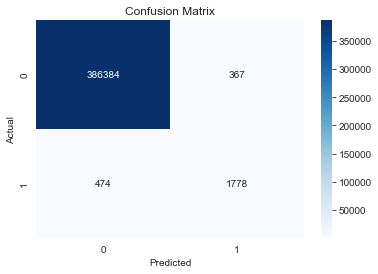

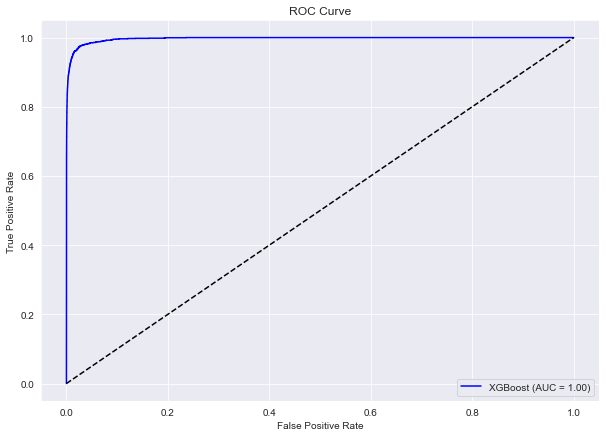

In [46]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
    'scale_pos_weight': [1, 5, 10]

}

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Stratified K-Fold Cross-Validation to ensure balanced class distribution
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=50,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
# Fit the model
random_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_xgb = random_search.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test_scaled)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
y_pred_prob = best_xgb.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# <font color="006179"> Resampling



In [47]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# Calculate scale_pos_weight based on the original y_train distribution
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE and resample the data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the distribution in the balanced dataset
print("Value counts in y_train_balanced after SMOTE:")
print(y_train_balanced.value_counts())

Value counts in y_train_balanced after SMOTE:
is_fraud
0    902418
1    902418
Name: count, dtype: int64


In [53]:
# Initialize XGBoost classifier with the best parameters and cost-sensitive learning
xgb_classifier = XGBClassifier(
    subsample=1.0,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=scale_pos_weight  # Incorporating cost-sensitive learning
)

# Train the model using the balanced training data
xgb_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision-Recall Curve and AUPRC
y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)
print(f"AUPRC for XGBoost: {auprc:.4f}")

# Save the trained model
model_path = '/Users/nglongvu1002/Desktop/Main_model.joblib'
joblib.dump(xgb_classifier, model_path)
print(f"Model saved to {model_path}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    386751
           1       0.08      0.97      0.14      2252

    accuracy                           0.93    389003
   macro avg       0.54      0.95      0.55    389003
weighted avg       0.99      0.93      0.96    389003

Confusion Matrix:
[[360466  26285]
 [    78   2174]]
AUPRC for XGBoost: 0.7737
Model saved to /Users/nglongvu1002/Desktop/Main_model.joblib


## Model Comparison: Focus on False Negatives

### **Definitions:**
- **False Negatives (FN):** Cases where the model incorrectly predicts a negative outcome (non-fraud) when the true outcome is positive (fraud).
- **Precision:** The proportion of true positive predictions among all positive predictions made by the model.
- **Recall:** The proportion of true positive predictions among all actual positive cases.

### **Performance Metrics:**

#### **Original Model:**
- **False Negatives (FN):** 593
- **True Positives (TP):** 1,659
- **Precision:** 0.83
- **Recall:** 0.74

#### **Resampled Model:**
- **False Negatives (FN):** 78
- **True Positives (TP):** 2,174
- **Precision:** 0.08
- **Recall:** 0.97

### **Comparison:**

| Metric                | Original Model | Resampled Model |
|-----------------------|----------------|-----------------|
| False Negatives (FN)  | 593            | 78              |
| True Positives (TP)   | 1,659          | 2,174           |
| Precision             | 0.83           | 0.08            |
| Recall                | 0.74           | 0.97            |

### **Why Prefer the Resampled Model:**

1. **Reduction in False Negatives:**
   - **Original Model:** 593 fraud cases missed.
   - **Resampled Model:** Only 78 fraud cases missed.
   - **Advantage:** The resampled model significantly reduces the number of missed fraud cases. This is crucial in fraud detection, where failing to detect fraudulent transactions (false negatives) can lead to severe consequences such as financial losses and damage to reputation.

2. **Higher Recall:**
   - **Original Model Recall:** 0.74
   - **Resampled Model Recall:** 0.97
   - **Advantage:** Higher recall in the resampled model means it is better at identifying true fraud cases. For applications where missing fraud cases is costly, this improved recall makes the resampled model more suitable.

3. **Trade-off with Precision:**
   - While the resampled model's precision decreases (0.08 vs. 0.83), leading to more false positives, the reduced false negatives might be more valuable in contexts where detecting fraud is critical and can be managed by additional verification processes.

### **Conclusion:**
If the priority is to minimize the risk of missing fraud cases (false negatives), the resampled model is preferable despite its lower precision. The improved recall means fewer fraudulent transactions are overlooked, which is often more critical in fraud detection scenarios. The increased number of false positives can be managed through further verification or additional steps in the fraud detection process.




## <font color ="3fd8fe"> Hyperparameter tuning using RandomSearchedCV and Stratified K-Fold Cross-Validation in Resampled Model


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.67      0.81      0.73      2252

    accuracy                           1.00    389003
   macro avg       0.84      0.90      0.87    389003
weighted avg       1.00      1.00      1.00    389003


Confusion Matrix:
[[385855    896]
 [   423   1829]]


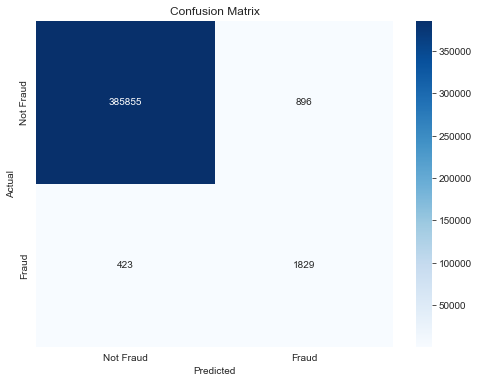

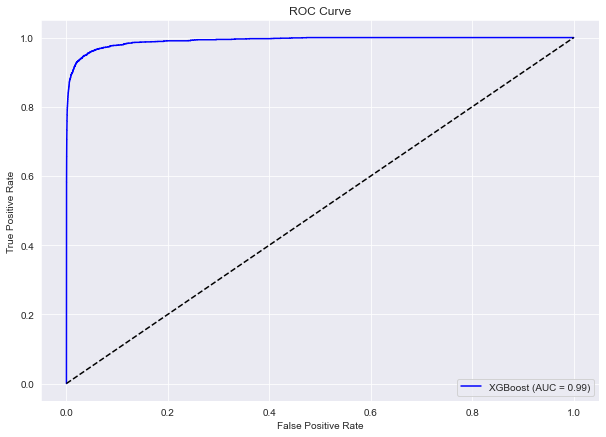

In [50]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Stratified K-Fold Cross-Validation to ensure balanced class distribution
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define the parameter grid for Randomized Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform Randomized Search with Cross-Validation on the resampled data
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=50,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model with the balanced training data
random_search.fit(X_train_balanced, y_train_balanced)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_xgb = random_search.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
y_pred_prob = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# <font color="006179"> Save the Model
